In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Environment:
    def __init__(self):
        pass

    def round(self, a_t):
        pass

In [3]:
class BernoulliEnvironment(Environment):
    def __init__(self, p, T, seed):
        np.random.seed(seed)
        self.K = len(p)
        self.rewards = np.random.binomial(n=1, p=p, size=(T, self.K))
        self.t = 0

    def round(self, a_t):
        r_t = self.rewards[self.t, a_t]
        self.t +=1
        return r_t

In [4]:
class Learner:
    # this is the blueprint of an Agent-type class, we can customize this with our strategy
    def __init__(self):
        pass
    def pull_arm(self):
        pass
    def update(self, r_t):
        pass
      

In [5]:
class TSLearner(Learner):
    def __init__(self, K):
        self.K = K
        self.a_t = None
        self.alpha, self.beta = np.ones(K), np.ones(K)
        self.N_pulls = np.zeros(K)

    def pull_arm(self):
        theta = np.random.beta(self.alpha, self.beta)
        self.a_t = np.argmax(theta)
        return self.a_t
    
    def update(self, r_t):
        self.alpha[self.a_t] += r_t
        self.beta[self.a_t] += 1-r_t
        self.N_pulls[self.a_t] += 1

In [6]:
class UCB1Learner(Learner):
    def __init__(self, K, T):
        self.K = K
        self.T = T
        self.a_t = None
        self.average_rewards = np.zeros(K)
        self.N_pulls = np.zeros(K)
        self.t = 0
    
    def pull_arm(self):
        if self.t < self.K:
            self.a_t = self.t 
        else:
            ucbs = self.average_rewards + np.sqrt(2*np.log(self.T)/self.N_pulls)
            self.a_t = np.argmax(ucbs)
        return self.a_t
    
    def update(self, r_t):
        self.N_pulls[self.a_t] += 1
        self.average_rewards[self.a_t] += (r_t - self.average_rewards[self.a_t])/self.N_pulls[self.a_t]
        self.t += 1

In [7]:
p = np.array([0.1, 0.2, 0.4, 0.5, 0.7])
K = len(p)
T = 365 #number of rounds
best_action = np.argmax(p)
print(f'Best action is {best_action}')
expected_clairvoyant_rewards = np.repeat(p[best_action], T)

n_trials = 100 # number of bids

Best action is 4


Best action is 4


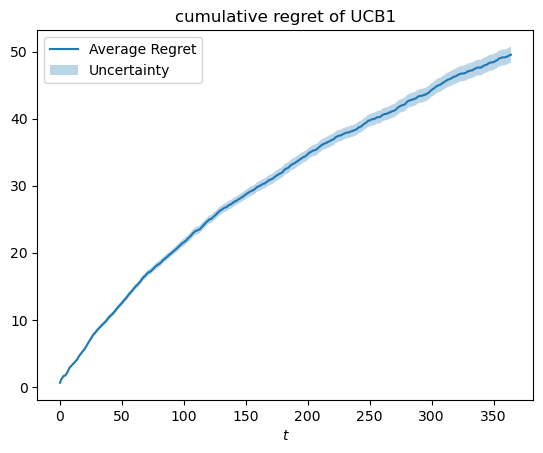

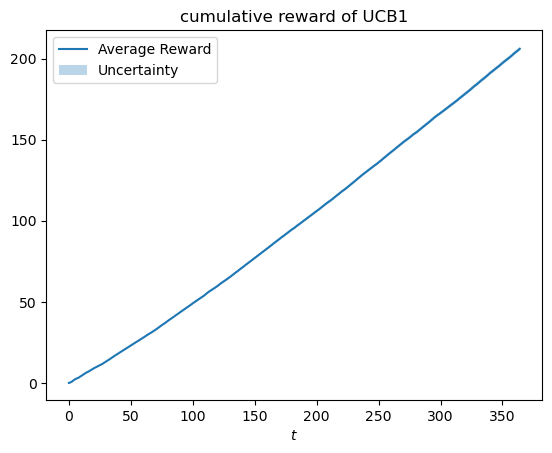

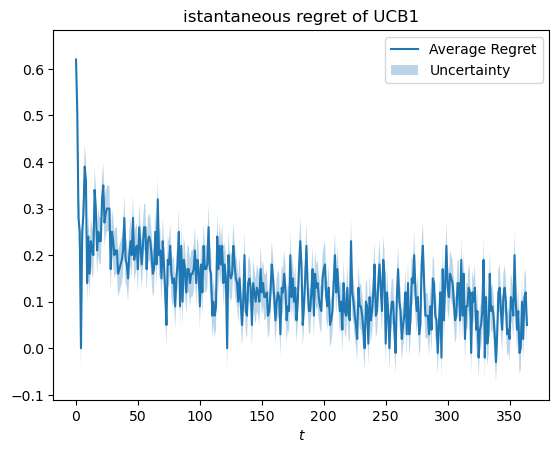

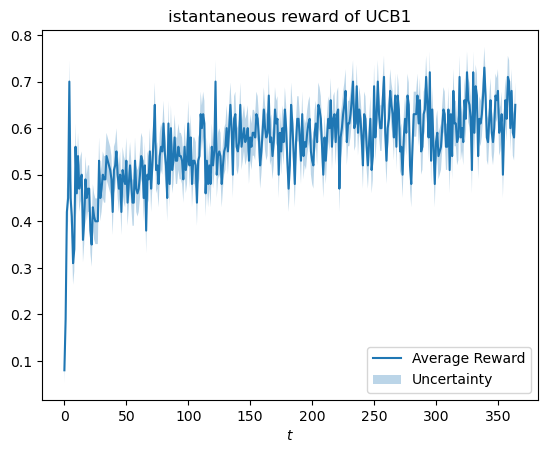

In [8]:
p = np.array([0.1, 0.2, 0.4, 0.5, 0.7])
K = len(p)
T = 365 #number of rounds
best_action = np.argmax(p)
print(f'Best action is {best_action}')
expected_clairvoyant_rewards = np.repeat(p[best_action], T)

n_trials = 100 # number of bids

regret_per_trial = []
reward_per_trial = []
istantaneous_regret_per_trial = []
istantaneous_reward_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    env = BernoulliEnvironment(p, T, seed)
    ucb_agent = UCB1Learner(K, T)

    agent_rewards = np.array([])

    for t in range(T):
        a_t = ucb_agent.pull_arm()
        r_t = env.round(a_t)
        ucb_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(expected_clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)
    
    cumulative_reward = np.cumsum(agent_rewards)
    reward_per_trial.append(cumulative_reward)
    
    istantaneous_regret = expected_clairvoyant_rewards-agent_rewards
    istantaneous_regret_per_trial.append(istantaneous_regret)

    istantaneous_reward = agent_rewards
    istantaneous_reward_per_trial.append(istantaneous_reward)

regret_per_trial = np.array(regret_per_trial)
average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('cumulative regret of UCB1')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

reward_per_trial = np.array(reward_per_trial)
average_reward = reward_per_trial.mean(axis=0)
reward_sd = reward_per_trial.std(axis=0)

plt.plot(np.arange(T), average_reward, label='Average Reward')
plt.title('cumulative reward of UCB1')
plt.fill_between(np.arange(T),
                average_reward-reward_sd/np.sqrt(n_trials),
                average_reward+reward_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

istantaneous_regret_per_trial = np.array(istantaneous_regret_per_trial)
average_regret = istantaneous_regret_per_trial.mean(axis=0)
regret_sd = istantaneous_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('istantaneous regret of UCB1')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

istantaneous_reward_per_trial = np.array(istantaneous_reward_per_trial)
average_reward = istantaneous_reward_per_trial.mean(axis=0)
reward_sd = istantaneous_reward_per_trial.std(axis=0)

plt.plot(np.arange(T), average_reward, label='Average Reward')
plt.title('istantaneous reward of UCB1')
plt.fill_between(np.arange(T),
                average_reward-reward_sd/np.sqrt(n_trials),
                average_reward+reward_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
#plt.plot((0,T-1), (average_regret[0], average_regret[-1]), 'ro', linestyle="--")
plt.xlabel('$t$')
plt.legend()
plt.show()

Best action is 4


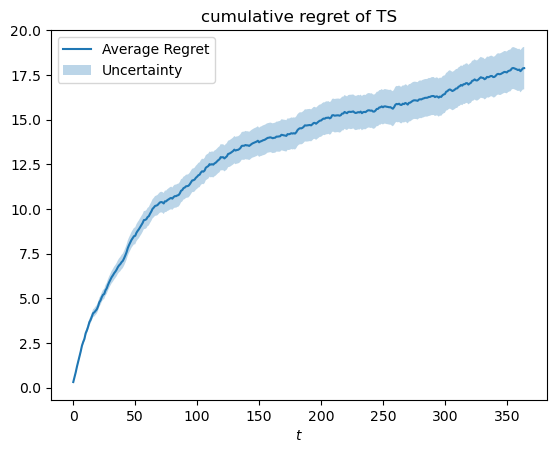

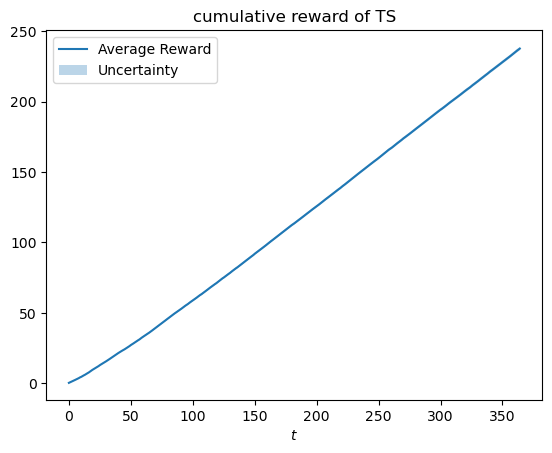

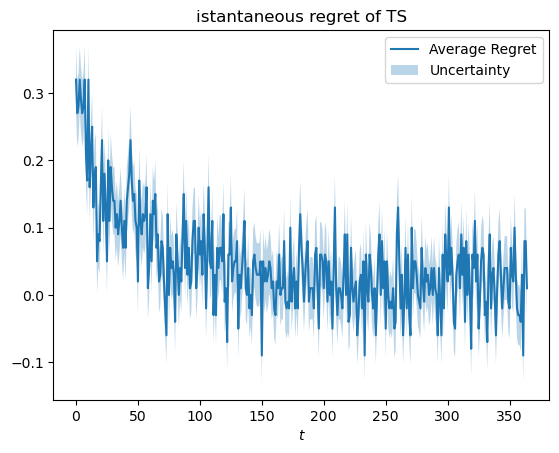

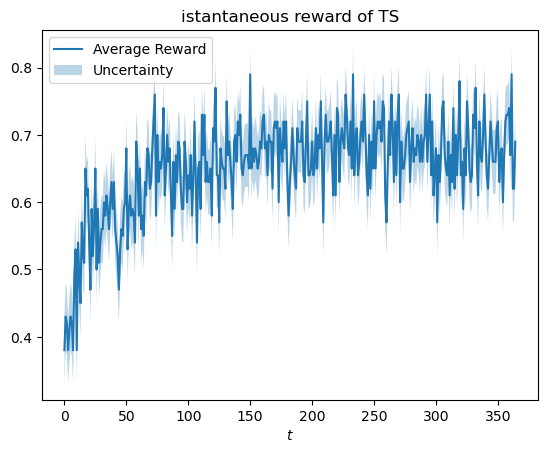

In [9]:
p = np.array([0.1, 0.2, 0.4, 0.5, 0.7])
K = len(p)
T = 365 #number of rounds
best_action = np.argmax(p)
print(f'Best action is {best_action}')
expected_clairvoyant_rewards = np.repeat(p[best_action], T)

n_trials = 100 # number of bids

regret_per_trial = []
reward_per_trial = []
istantaneous_regret_per_trial = []
istantaneous_reward_per_trial = []

for seed in range(n_trials):
    np.random.seed(seed)
    env = BernoulliEnvironment(p, T, seed)
    ts_agent = TSLearner(K)

    agent_rewards = np.array([])

    for t in range(T):
        a_t = ts_agent.pull_arm()
        r_t = env.round(a_t)
        ts_agent.update(r_t)

        agent_rewards = np.append(agent_rewards, r_t)

    cumulative_regret = np.cumsum(expected_clairvoyant_rewards-agent_rewards)
    regret_per_trial.append(cumulative_regret)

    cumulative_reward = np.cumsum(agent_rewards)
    reward_per_trial.append(cumulative_reward)
    
    istantaneous_regret = expected_clairvoyant_rewards-agent_rewards
    istantaneous_regret_per_trial.append(istantaneous_regret)

    istantaneous_reward = agent_rewards
    istantaneous_reward_per_trial.append(istantaneous_reward)
    
regret_per_trial = np.array(regret_per_trial)
average_regret = regret_per_trial.mean(axis=0)
regret_sd = regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('cumulative regret of TS')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
plt.xlabel('$t$')
plt.legend()
plt.show()

reward_per_trial = np.array(reward_per_trial)
average_reward = reward_per_trial.mean(axis=0)
reward_sd = reward_per_trial.std(axis=0)

plt.plot(np.arange(T), average_reward, label='Average Reward')
plt.title('cumulative reward of TS')
plt.fill_between(np.arange(T),
                average_reward-reward_sd/np.sqrt(n_trials),
                average_reward+reward_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
plt.xlabel('$t$')
plt.legend()
plt.show()

istantaneous_regret_per_trial = np.array(istantaneous_regret_per_trial)
average_regret = istantaneous_regret_per_trial.mean(axis=0)
regret_sd = istantaneous_regret_per_trial.std(axis=0)

plt.plot(np.arange(T), average_regret, label='Average Regret')
plt.title('istantaneous regret of TS')
plt.fill_between(np.arange(T),
                average_regret-regret_sd/np.sqrt(n_trials),
                average_regret+regret_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
plt.xlabel('$t$')
plt.legend()
plt.show()

istantaneous_reward_per_trial = np.array(istantaneous_reward_per_trial)
average_reward = istantaneous_reward_per_trial.mean(axis=0)
reward_sd = istantaneous_reward_per_trial.std(axis=0)

plt.plot(np.arange(T), average_reward, label='Average Reward')
plt.title('istantaneous reward of TS')
plt.fill_between(np.arange(T),
                average_reward-reward_sd/np.sqrt(n_trials),
                average_reward+reward_sd/np.sqrt(n_trials),
                alpha=0.3,
                label='Uncertainty')
plt.xlabel('$t$')
plt.legend()
plt.show()


NameError: name 'plt' is not defined